# INF-395/477 Redes Neuronales Artificiales I-2018
## Tarea 1 - Redes neuronales y *Deep learning*
> Juan Pablo Cruz 201473004-7

> Felipe Chacón 201303017-3

In [0]:
from IPython.display import Image

# 1. Predición de Entalpía de Atomización

**a) Construya un dataframe con los datos a analizar y descríbalo brevemete. Además, realice la división de éste en los conjuntos de entrenamiento, validación y testeo correspondientes. Comente por qué se deben eliminar ciertas columnas.**

> Los datos corresponden a simulaciones que permiten deducir la variación de entalpía en moléculas. El dataframe generado consta de $1278$ dimensiones y de $16242$ muestras.

>La data se separa en un $60\%$ para el conjunto de entrenamiento, $25\%$ para validación y un $15\%$ para testeo.

> Las columnas *Unnamed* y *pubchem_id* se eliminan porque representan un identificador de cada muestra, por lo tanto, no son valores originales de los datos y no tienen relación numérica con ellos. Cuando son eliminadas estas columnas, se tienen $1275$ dimensiones más el target.

**a.1) Una buena práctica es la de normalizar los datos antes de trabajar con el modelo. Explique por qué se aconseja dicho preprocesamiento.**

> Es aconsejable normalizar los datos debido a la diferencia de escala entre los atributos de una misma muestra, ya que el error generado por atributos con alta dimensionalidad opaca aquellos de menor escala. Además, si los inputs resultan ser muy grandes, el primer output obtenido resultará ser un valor que puede llegar a "explotar", generando un enorme valor en el error, lo que generará que la actualización sea mayor de lo que debiese ser en todos los pesos.


**b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de epochs de entrenamiento, para una red feedforward de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.**

```python
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))
```

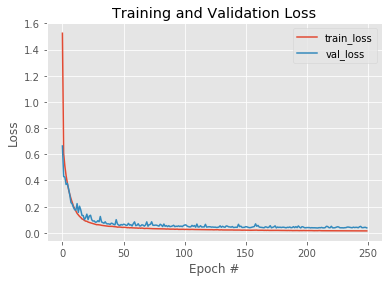

In [4]:
Image("1b.png")

> Dentro de las primeras $25$ *epochs* se produce la mayor reducción del error de entrenamiento y validación. Mientras que el de entrenamiento es bastante plano, el de validación tiene unos cuantos altos cada ciertas *epochs*, pero sigue manteniendo una tendencia a disminuir dentro de un rango acotado.

**c) Repita el paso anterior, utilizado ’*ReLU*’ como función de activación y compare con lo obtenido en b). **



```python
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))
```



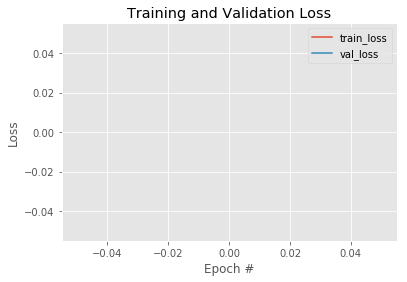

In [5]:
Image("1c.png")

> El modelo, utilizando la función de activación *ReLU*, diverge totalmente en todas las repeticiones del experimento. Lo anterior puede deberse a que *ReLU* solo acepta valores positivos, por lo que al sumar toda esa gran cantidad de valores, la suma solo irá en aumento, más aún cuando se combinen las salidas de $256$ neuronas en la capa final con una función de activación lineal.


**d) Repita b) y c) variando la tasa de aprendizaje (*learning rate*) en un rango sensible. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.**

> En ambas arquitecturas, hay divergencia en todos los experimentos. A excepción del primero, en el que el learning rate es de 0, por lo tanto, no aprende y los errores se mantienen constantes. En el caso del modelo con *ReLU*, la razón de esto resulta la misma que en **c)**, pero para la *Sigmoid* esto ocurre debido a que valores altos de aprendizaje pueden provocar que la actualización de los pesos sea muy grande y estos se alejen del óptimo, por lo que, eventualmente, el modelo caerá en una posición que lo hará diverger.

**e) Entrene los modelos considerados en b) y c) usando *progressive decay*. Compare y comente.**

> **Sigmoid.** El _learning rate_ utilizado fue de $0.2$. Los errores iniciales son bastante grandes, pero siguen la tendencia a disminuir a medida que aumenta el _decay_ del _learning rate_. El resultado de este experimento fue peor que el del modelo presentado en b).

> **ReLU.** Hay divergencia en todos los experimentos utilizando la función de activación ReLU.

**f) Entrene los modelos considerados en b) y c) utilizando SGD en mini-*batches*. Experimente con diferentes tamaños del *batch*. Comente.**

> **Sigmoid.** A medida que los batches van aumentando, la disminución del error ocurre de forma drástica mas tempranamente y se va acercando al eje y.
En el caso particular de _batch size_ igual a $1$, el entrenamiento demora bastante y los resultados no son buenos. Esto puede deberse a que al obtener el error de solo 1 dato a la vez, las actualizaciones de los pesos son menos representativas del conjunto completo de los datos, no logrando llegar a una generalización de los datos.

> **ReLU.** Los primeros experimentos divergen, luego, al aumentar los batches, se alcanzan a visualizar algunos errores, los que luego también diverguen. Es importante notar que en la mayoría de los gráficos, el _eje x_, donde se encuentran las _epochs_, el rango es de $0$ a $1$, y en algunos casos de $0$ a $4$. Por lo que la divergencia ocurre al comienzo del entrenamiento.

**g) Entrene los modelos obtenidos en b) y c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. Compare los desempeños de adagrad, adadelta, RMSprop y adam. ¿Se observa en algún caso un mejor resultado final? ¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de validación?**

**Sigmoid**

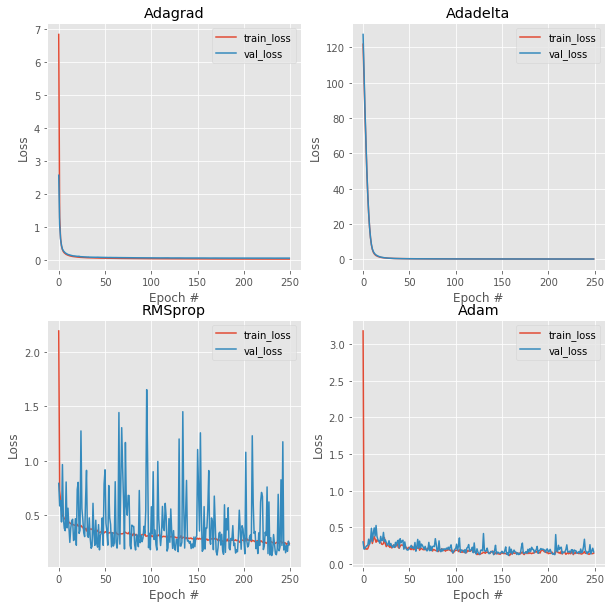

In [5]:
Image("1gS.png")

* Adagrad: El error es bastante pequeño y converge rápidamente desde el inicio.
* Adadelta: Parte con errores grandes, pero converge rápidamente, pero más lento que Adagrad.
* RMSprop: El error de entrenamiento converge rápidamente, pero el de validación varia entre $0$ y $1.5$, sin lograr estabilizarse al final de las $250$ epochs. Pero se debe notar que el error se encuentra en un rango pequeño.
* Adam: El error de entrenamiento y validación disminuyen rápidamente dentro de las primeras epochs, luego se mantienen oscilando pero en un rango muy acotado entre $0$ y $0.5$

> Considerando el error de entrenamiento y validación final de cada modelo con los distintos optimizadores, el que obtuvo el mejor resultado fue el de Adagrad con $0.015$ en entrenamiento y $0.043$ en validación.

> La mayor convergencia en entrenamiento ocurre con el optimizador de Adam, sin embargo, el resto de optimizadores tambien converge dentro de las primeras epochs.

> El optimizador de Adam parece diminuir el error de validación más rápido que los otros, pero, el optimizador de Adagrad logra una mejor estabilidad que Adam y con errores bajos.

**ReLU**

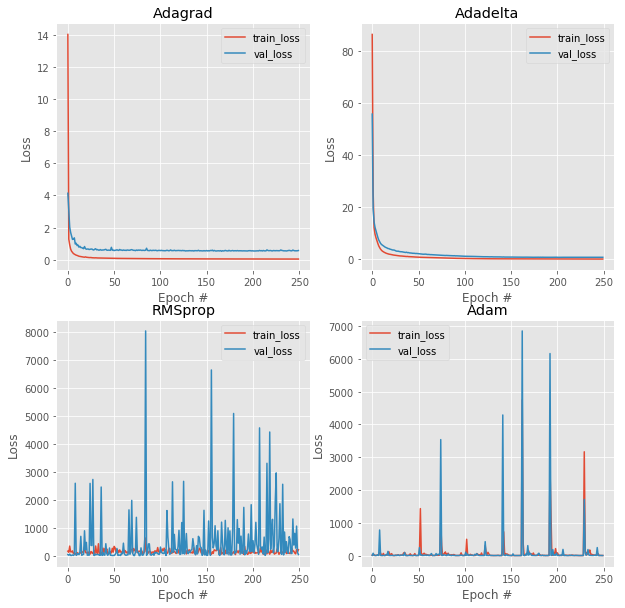

In [6]:
Image("1gR.png")

* Adagrad: EL error es bastante pequeño y converge rápidamente desde el inicio.
* Adadelta: Parte con un mayor error que Adagrad, tanto en entrenamiento como en validación, pero, de igual forma converge rápidamente.
* RMSprop: No hay convergencia, los errores de validación son muy distantes entre ellos y hay muchos altos a medida que pasan las epochs. En cuanto al error de entrenamiento, parece ser constante entre $0$ y $1000$, pero debido a la escala no se puede afirmar.
* Adam: Tanto en entrenamiento como en validación no hay convergencia, pues hay valores altos en ambos errores.

> Considerando el error de entrenamiento y validación final de cada modelo con los distintos optimizadores, el que obtuvo el mejor resultado fue el de Adagrad con $0.029$ en entrenamiento y $0.562$ en validación. El de RMSprop obtuvo errores finales de entrenamiento y validación bastante más altos que los demás optimizadores.

> Dejando de lado RMSprop y Adam debido a la información que da el gráfico. El optimizador que mejor se desempeña en la convergencia en el entrenamiento es el de Adagrad.

> En cuanto a la convergencia en validación, el optimizador de Adagrad se estabiliza más rápido. Seguido por el de Adadelta, cuyo gráfico es parecido a Adagrad, diferenciándose en la escala.

**h) Entrene los modelos obtenidos en b) y c) utilizando regularizadores $l_1$ y $l_2$ (*weight decay*). Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente. Además evalúe el efecto de regularizar solo la primera capa *vs* la segunda, comente.**

> **Sigmoid**
> * Al aumentar el valor del parámetro del regularizador $l1$, ya sea en la primera o en la segunda capa, el error de entrenamiento en la _epoch_ $1$ va aumentando, y se pueden observar _spikes_ cada vez más altos y con mayor frecuencia en el error de validación.
* Utilizar un regularizador $l1$ en la Capa 2, en vez de en la 1, entrega mejores resultados, los errores, tanto de entrenamiento como de validación, son mas bajos.

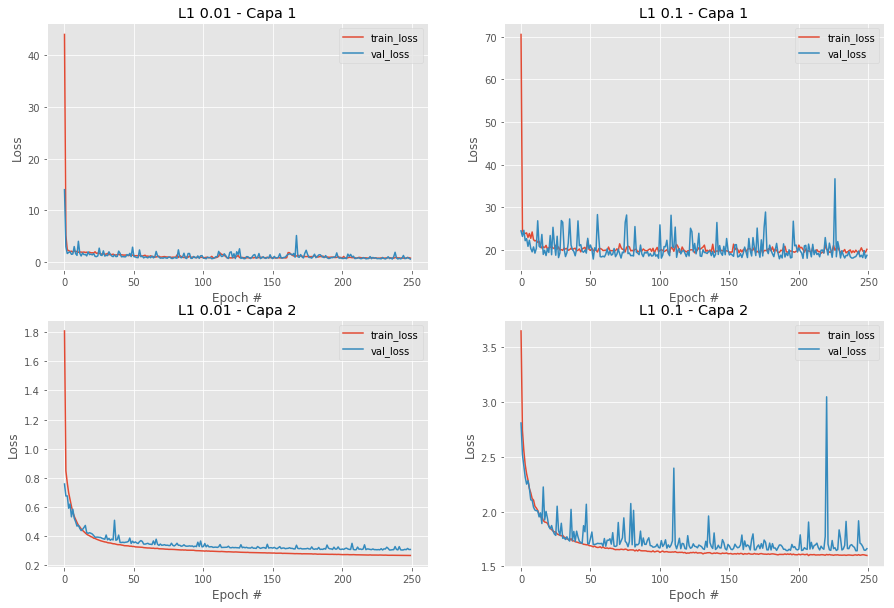

In [14]:
Image("1hS.png")

> * Al aumentar el valor del parámetro del regularizador $l2$ en la capa 1, el error de entrenamiento inicial aumenta, pero además decae a una velocidad mucho mayor.
>* Al aumentar el valor del parámetro del regularizador $l2$ en la capa2, el error de de entrenamiento en todo momento resulta levemente mayor.
>* Al comparar el uso del regularizador $l2$ en la capa 1 con su uso en la capa 2, se puede observar como en el primer caso el error inicial es mucho mayor que en el segundo caso. Además, el error decae mucho más rápido al hacer uso del regularizador en la capa 2.

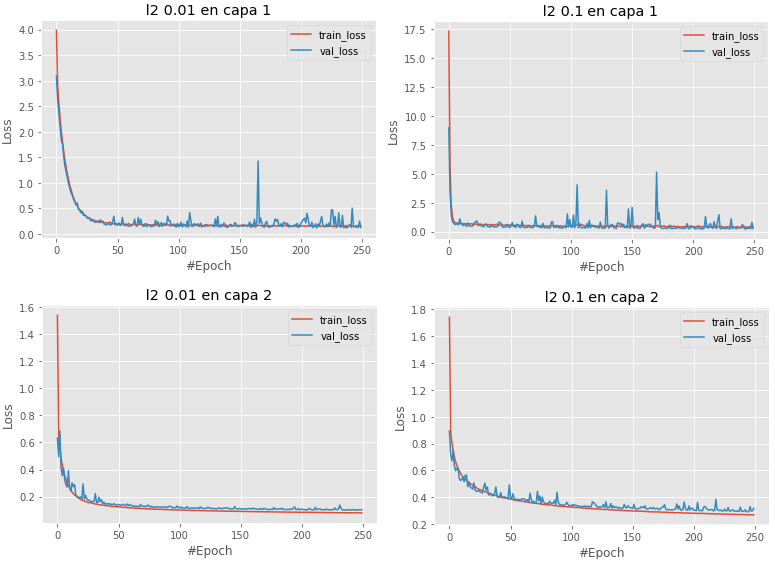

In [7]:
Image("1hsl2.png")

> **ReLU**

> * Utilizando la función de activación ReLU, todos los modelos divergieron con excepción del que usa el regularizador $l1$ en ambas capas con un parámetro igual a $0.2$. Sin embargo, el modelo no es bueno porque finaliza con un alto error de validación.

**i) Entrene los modelos obtenidos en b) y c) utilizando *Dropout*. Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente.**

> **Sigmoid.** Al aumentar el porcentaje de _Dropout_, el error de validación comienza a tener _spikes_ más notorios y el error de entrenamiento al comienzo aumenta levemente con cada experimento. Además, ambos errores empiezan a converger en errores más altos, alejándose más entre si, ya que el de entrenamiento sube en mayor medida que el de validación.

** Dropout = 0**

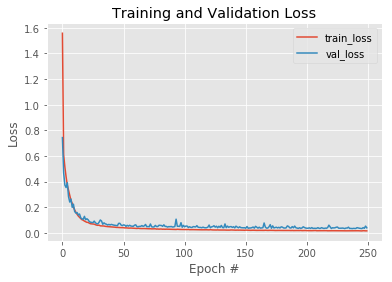

In [15]:
Image("1i1.png")

**Dropout = 0.5**

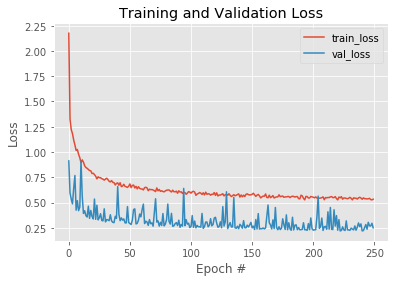

In [16]:
Image("1i6.png")

> **ReLU.** Utilizando la función de activación ReLU, todos los modelos, con distintos porcentajes de _Dropout_, divergieron.

**j) Fijando todos los demás hiper-parámetros del modelo definido en b) y en c), utilice validación cruzada con un número de *folds* igual a *K* = 5 y *K*=10 para determinar el mejor valor correspondiente a un parámetro que usted elija (tasa de aprendizaje, número de neuronas, parámetro de regularización, etc) ¿El mejor parámetro para la red con sigmoidal es distinto que para ReLU? ¿Por qué sucede? Además mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.**

> * **Cantidad de Neuronas** 
> Dado el set [1,2,4,8,16,32,64,128,256,512], se obtienen los siguientes resultados:
>>* Sigmoid. Cantidad de neuronas que entrega el mejor modelo con K = 5:  $512$.
>>>Loss Sigmoid K5: 0.019
>>* Sigmoid. Cantidad de neuronas que entrega el mejor modelo con K = 10:  $512$.
>>>Loss Sigmoid K10: 0.018
>>* ReLU. Cantidad de neuronas que entrega el mejor modelo con K = 5:  $512$.
>>>Loss ReLU K5: 0.070
>>* ReLU. Cantidad de neuronas que entrega el mejor modelo con K = 10:  $512$.
>>>Loss ReLU K10: 0.090

>> El mejor parámetro es 512 neuronas para los modelos con función de activación Sigmoid y ReLU. En general, mientras más neuronas por capa tenga un modelo, mejor es el resultado que se obtendrá.

> * **Learning Rate**
> Dado el set [0.01,0.1,0.3,0.5,0.7], se obtienen los siguientes resultados:
>>* Sigmoid. Learning rate para SGD que entrega el mejor modelo con K = 5: $0.01$
>>>Loss Sigmoid K5: 0.027
>>* Sigmoid. Learning rate para SGD que entrega el mejor modelo con K = 10: $0.01$  
>>>Loss Sigmoid K10: 0.030
>>* ReLU. Learning rate para SGD que entrega el mejor modelo con K = 5: NaN  
>>>Loss ReLU K5:  NaN
>>* ReLU. Learning rate para SGD que entrega el mejor modelo con K = 10:NaN  
>>>Loss ReLU K10: NaN

>> El mejor parámetro es de 0.01 en SGD para todos los modelos con función de activación Sigmoid. Para el caso con función de activación ReLU, el resultado diverge, por lo que no se pudo obtener valores. Debido a esto, no se puede comparar el valor de *learning_rate* con el modelo con Sigmoid.

# 2. Deep Networks

**a) Se trabajará con las etiquetas escaladas uniformemente, es decir, $\mu=0$ y $\sigma=1$, ajuste sobre el conjunto de entrenamiento y transforme éstas además de las de validación y pruebas.**

**b) Para el mismo problema definido anteriormente se entrenarán diferentes redes. En esta primera instancia se trabajará con la misma red de la pregunta b), inicializada con pesos uniforme. Visualice el gradiente de la función de pérdida (*loss*) para el conjunto de entrenamiento (promedio del gradiente de cada dato) respecto a los pesos en las distintas capas, para esto se le pedirá el cálculo del gradiente para una capa mediante la función de *gradients* en el *backend* de Keras. Deberá generar un *histograma* para todos los pesos de cada capa antes y despues del entrenamiento con 250 *epochs*. Comente.**


```python
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

```

** Antes de entrenar:**

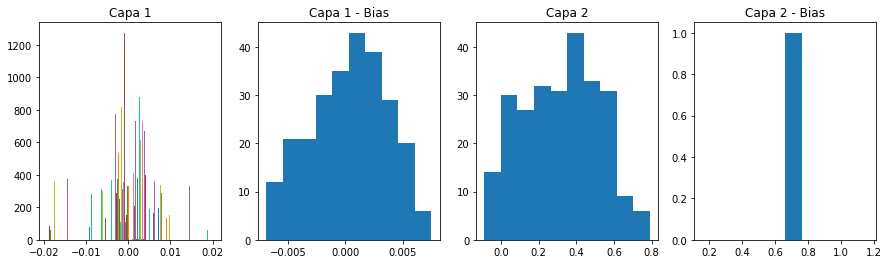

In [2]:
Image("2b1.png")

** Despues de entrenar:**

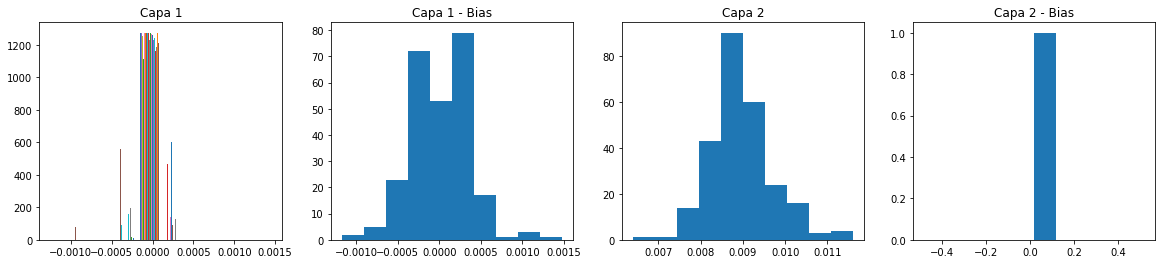

In [3]:
Image("2b2.png")

> Antes del entrenamiento, los gradientes son obtenidos utilizando los pesos inicializados con una distribución uniforme, por lo que la actualización de ellos serán mayores que los de un modelo que fue entrenado y convergió.
Después del entrenamiento, los gradientes son cercanos a $0$, por lo que la actualización de los pesos es mínima. Esto es un indicio de que el modelo está convergiendo.

**c) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento pero ahora entrenando una red mucho más profunda de 6 capas, 5 capas escondidas y 1 de salida. Utilice el inicializador de pesos *uniform* el cual inicializa mediante una distribución uniforme entre $-1/\sqrt{N}$ y $1/\sqrt{N}$ para cada capa, con $N$ el número de neuronas de la capa anterior. Por simplicidad visualice las 3-4 primeras capas de la red. Comente si observa el efecto del *gradiente desvaneciente* antes y/o después de entrenar.**



```python
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
```



** Capas 1 a 4, sin gradientes de Bias, después de entrenar:**

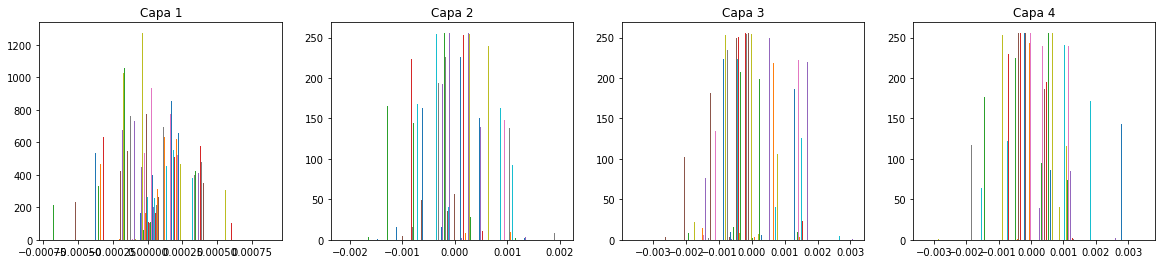

In [9]:
Image("2c1.png")

> Si, ocurre el efecto del gradiente desvaneciente. Se puede notar en las capas 1 y 2, que en esta última la actualización es mayor que en la primera, a la vez que la segunda capa se actualiza menos que la capa 3 y 4. Con esto se concluye que las últimas capas reciben actualizaciones mayores, las que se van amortiguando a medida que se pasa a las capas anteriores.

**d) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento, pero ahora entrenando la red profunda con el inicializador de Glorot, es decir, una distribución uniforme entre -$\sqrt{6/(N_{in}+N_{out})}$  y $\sqrt{6/(N_{in}+N_{out})}$ . Por simplicidad visualice las 3-4 primeras capas de la red. Comente si el efecto del *gradiente desvaneciente* se amortigua antes y/o después de entrenar**



```python
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
```



** Capas 1 a 4, sin gradientes de Bias, después de entrenar:**

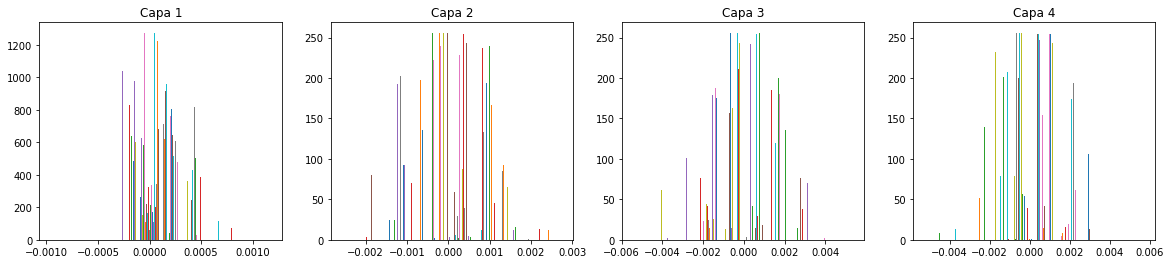

In [10]:
Image("2d1.png")

> Se nota un amortiguamiento en el efecto del gradiente desvaneciente al utilizar el inicializador de Glorot

**e) Vuelva a repetir la experimentación ahora cambiando la función de activación por ReLU, es decir, deberá visualizar los gradientes de los pesos de cada capa antes y después del entrenamiento, con inicialización *uniform* y comparar con la inicialización de He, es decir, una distribución uniforme entre $-\sqrt{6/N_{in}}$ y $\sqrt{6/N_{in}} $. Comente si ocurre el mismo fenómeno anterior (para función sigmoidal) sobre el efecto del *gradiente desvaneciente* para la función ReLU. Explique la importancia de la inicialización de los pesos dependiendo de la arquitectura.**

** Capas 1 a 4, sin gradientes de Bias, después de entrenar con inicialización *Uniform*:**

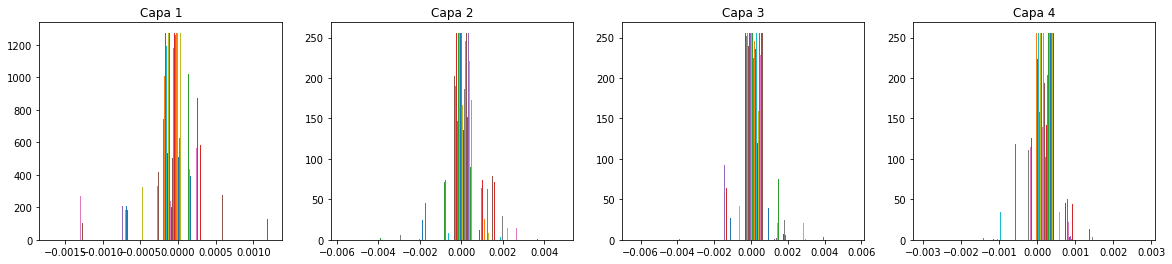

In [11]:
Image("2e1.png")

> No se observa el efecto del gradiente desvaneciente en el modelo con la función de activación ReLU y con inicialización *uniform*. Esto se debe principalmente a que la derivada de la función ReLU, entrega un valor de 1 o 0, por lo que a medida que se avanza en las capas en el algoritmo de *back-propagration*, el valor se mantendrá igual o se reducirá a 0.

> La importancia de la inicialización es que con __He__, el modelo no converge. Lo que significa que los valores iniciales afectan en gran medida la búsqueda de un óptimo mínimo.

** f) ¿Qué es lo que sucede con la red más profunda? ¿El modelo logra convergencia en su entrenamiento? Modifique aspectos estructurales (funciones de activación, inicializadores, regularización, *momentum*, variación de tasa de aprendizaje, entre otros) de la red profunda de 6 capas definida anteriormente (no modifique la profundidad ni el número de neuronas) para lograr un error cuadrático medio (*mse*) similar o menor al de una red no profunda, como la definida en b) en esta sección, sobre el conjunto de pruebas.**

> El modelo de **b)** obtiene el siguiente error cuadrático: \\
* 2437/2437 [====================] - 0s 47us/step \\
Loss Sigmoid: 0.004

> El modelo de *deep neural network*  utilizado es:


```python
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='uniform',activation='relu'))
model.add(Dense(256, kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

```

> El que entregó un error cuadrático de:

>>$0.002$

> Un primer modelo que se utilizó fue:

```python
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd,loss='mean_squared_error')

```

> El que entregó un error cuadrático mucho mayor que el de la red no profunda de:

>>$0.766$


** g) Experimente con la utilización de una función activación auxiliar (debido a que aproxima) a '*ReLU*' y que es continua derivable (*softplus*) ¿Cuál es el beneficio de ésta con respecto ReLU? Comente.**



```python
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='uniform',activation='softplus'))
model.add(Dense(256, kernel_initializer='uniform',activation='softplus'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
```

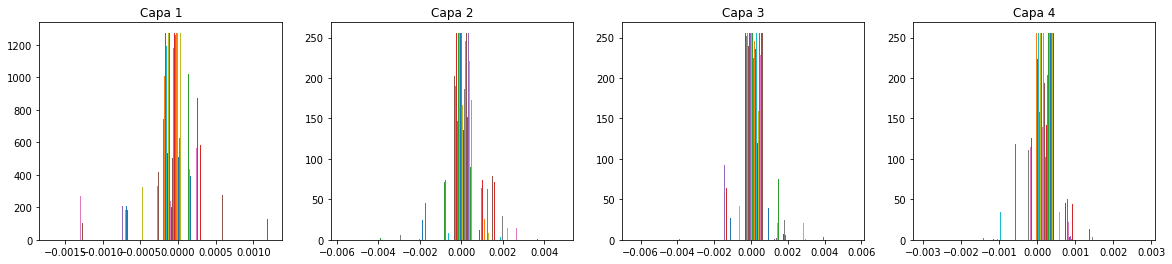

In [12]:
Image("2gRelu.png")

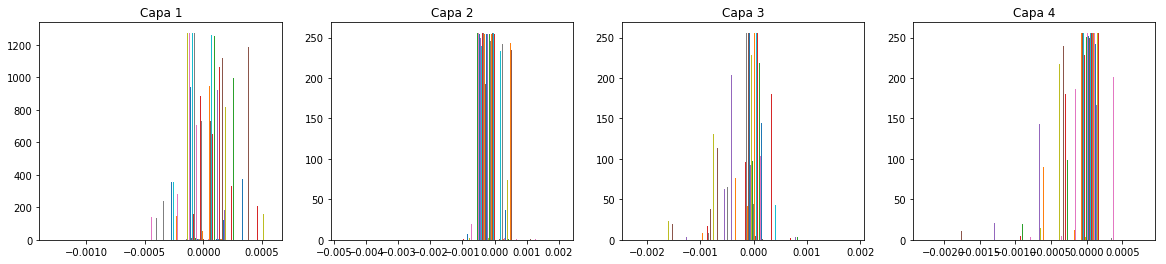

In [13]:
Image("2gSoftplus.png")

> Al ser de forma similar a la _ReLU_, pero continuamente derivable, la actualización de los pesos es mejor. Por lo que los gradientes en _softplus_ se encuentran menos dispersos y más centrados en el $0$ que utilizando _ReLU_, es decir, los gradientes van convergiendo de mejor forma.

**h) Pruebe con utilizar una red *shallow* (poco profunda), es decir, sitúe todas las neuronas en una única capa ¿Qué sucede con la convergencia del algoritmo? ¿Por qué sucede este fenómeno?**



```python
model = Sequential()
model.add(Dense(1024, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
```

> Fueron probados distintas inicializaciones del kernel.
* he_uniform
* glorot_uniform
* lecun_uniform
* lecun_normal
* random_uniform
* random_normal
* uniform

> La red _shallow_ diverge en todos los experimentos. Ya que la última capa tiene una función de activación lineal, esta sumará todos los outputs de la capa anterior, que en este caso son $1024$,  obteniendo errores más grandes que con menos neuronas y provocando que la actualización de los pesos se salte los óptimos locales y comiencen a diverger. Con las redes profundas la última capa solo recibe $256$ valores.

# 3. Entendimiento de imágenes de personas

**a) Cargue los datos dos dataset de entrenamiento y de pruebas ¿Cuántos datos hay en cada conjunto?**

> Hay $3500$ datos de entrenamiento y $1050$ datos de pruebas.

**b) Eliga cuál representación utilizará para trabajar los datos y entregárselos como *input* al modelo neuronal denso. Además extraiga las etiquetas del problema. Describa los datos utilizados.**



> La representación utilizada es la de características contextuales (*genFeat*). Las columnas de los datos utilizados son:


>1. xcenter: (normalized from 0 to 100). Left to right image coord
2. ycenter: (normalized from 0 to 100). top to bottom image coord
3. minSpanningTreeDegree
4. SizeRelativeToNeighbor:   >1 means face bigger than neighbor
5. PosX: negative means neighbor to the right of face (in eye dist units)
6. PosY: negative means Face below NN
7. neiAngle:  Angle of neighbor Face. Left eye at center, Cartesian coord system
8. myAngle:  angle of current Face
9. SizeRelAverage:   face size relative to the average
10. [x] position relative average. 
11. [y] position relative average. 
12. Size Relative to Planar FaceFit. 
13. Nearest Neighbor Gender   (NOT USED IN CVPR 09)
14. Nearest Neighbor Agebin   (NOT USED IN CVPR 09)

**c) Defina y entrene una modelo de red neuronal *feed forward* para la inferencia de la edad de la persona a través de la representación escogida. Intente llegar a un *mse* menor a 100 en el conjunto de pruebas. Recuerde que *NO* puede seleccionar modelos a través del conjunto de pruebas. Visualice sus resultados si estima conveniente.**

> Algunos modelos utilizados fueron:

Representación: genFeat \\
Loss: $396.090$

```python
model = Sequential()
model.add(Dense(16, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform',activation='elu'))
model.add(Dense(16, kernel_initializer='glorot_uniform',activation='elu'))
model.add(Dense(16, kernel_initializer='glorot_uniform',activation='elu'))
model.add(Dense(16, kernel_initializer='glorot_uniform',activation='elu'))
model.add(Dense(16, kernel_initializer='glorot_uniform',activation='elu'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
optimizer = Adagrad(lr=0.01)
model.compile(optimizer=optimizer,loss='mean_squared_error')

```



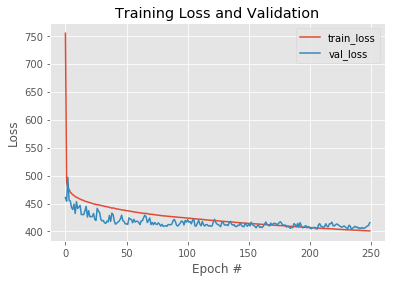

In [16]:
Image("3c1.png")

Representación: genFeat \\
Loss: $396.732$

```python
model = Sequential()
model.add(Dense(16, input_dim=x_train.shape[1], kernel_initializer='glorot_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(32, kernel_initializer='glorot_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(16, kernel_initializer='glorot_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(8, kernel_initializer='glorot_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, kernel_initializer='glorot_uniform'))
model.add(LeakyReLU(alpha=0.1))
optimizer = Adagrad(lr=0.01)
model.compile(optimizer=optimizer,loss='mean_squared_error')

```

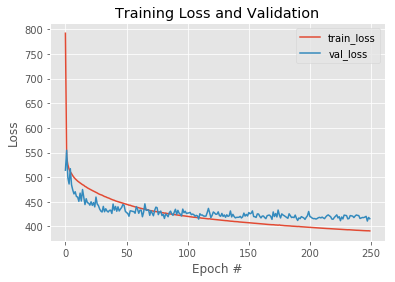

In [18]:
Image("3c2.png")